<a href="https://colab.research.google.com/github/OSegun/Data-Analysis-Machine-Learning-Modelling-Project/blob/main/accident_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn-extra

In [ ]:
pip install --upgrade ipykernel

Load Database into Colab Notbook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import All necessary Dependency

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Connect to Database

In [ ]:
# Connect to Database
conn = sqlite3.connect("/content/drive/MyDrive/accident_db_project/accident_data_v1.0.0_2023 (2) (2).db")
cursor = conn.cursor()

Query accident, vehicle, casualities, and lsoa table loading it to pandas dataframe

In [ ]:
# Accident Table
acc_df = pd.read_sql_query("""Select *
                            From accident""",conn)
acc_df.head() # Read the first five rows

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2017010001708           2017          010001708               532920.0   
1  2017010009342           2017          010009342               526790.0   
2  2017010009344           2017          010009344               535200.0   
3  2017010009348           2017          010009348               534340.0   
4  2017010009350           2017          010009350               533680.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                196330.0  -0.080107  51.650061             1   
1                181970.0  -0.173845  51.522425             1   
2                181260.0  -0.052969  51.514096             1   
3                193560.0  -0.060658  51.624832             1   
4                187820.0  -0.072372  51.573408             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  1                   2                     3  05/08/2017   
1                  3                   2                     1  01/01/2017   
2                  3                   3                     1  01/01/2017   
3                  3                   2                     1  01/01/2017   
4                  2                   1                     1  01/01/2017   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            7  03:12                        32                    E09000010   
1            1  01:30                         1                    E09000033   
2            1  00:30                         5                    E09000030   
3            1  01:11                        32                    E09000010   
4            1  01:42                         4                    E09000012   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000010                 3                105          6   
1               E09000033                 3                  5          6   
2               E09000030                 3                 13          6   
3               E09000010                 3               1010          1   
4               E09000012                 3                107          3   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           30                0                -1                 -1   
1           30                3                 4                  6   
2           30                3                 4                  5   
3           30                1                 4                  4   
4           20                6                 2                  3   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  0   
1                   0                                  0   
2                   0                                  0   
3                 154                                  0   
4                  10                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        0                 4   
1                                        0                 4   
2                                        0                 4   
3                                        4                 4   
4                                        5                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   1                        1                           0   
1                   1                        2                           0   
2                   1                        1                           0   
3                   2                        2                           0   
4                   1                        2                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                  

In [ ]:
acc_df.shape

(461352, 36)

In [ ]:
# Casualty Table
cas_df = pd.read_sql_query("""Select *
                            From casualty""",conn)
cas_df.head() # Read the first five rows

casualty_index accident_index  accident_year accident_reference  \
0               0  2017010001708           2017          010001708   
1               1  2017010001708           2017          010001708   
2               2  2017010001708           2017          010001708   
3               3  2017010009342           2017          010009342   
4               4  2017010009344           2017          010009344   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  1                   1               2                2   
1                  2                   2               1                1   
2                  2                   3               2                1   
3                  1                   1               2                2   
4                  3                   1               1                2   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               18                     4                  3   
1               19                     4                  2   
2               18                     4                  1   
3               33                     6                  3   
4               31                     6                  3   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                    0                    0              1   
1                    0                    0              0   
2                    0                    0              0   
3                    0                    0              1   
4                    0                    0              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                       0                                   0              9   
1                       0                                   0              2   
2                       0                                   0              2   
3                       0                                   0              9   
4                       0                                   0              9   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    2  
1                       -1                   -1  
2                       -1                   -1  
3                        1                    5  
4                        1                    5

In [ ]:
cas_df.shape

(600332, 19)

In [ ]:
# Vehicle Table
veh_df = pd.read_sql_query("""Select *
                            From vehicle""",conn)
veh_df.head() # Read the first five rows

vehicle_index accident_index  accident_year accident_reference  \
0              0  2017010001708           2017          010001708   
1              1  2017010001708           2017          010001708   
2              2  2017010009342           2017          010009342   
3              3  2017010009342           2017          010009342   
4              4  2017010009344           2017          010009344   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             9                        0   
1                  2             2                        0   
2                  1             9                        0   
3                  2             9                        0   
4                  1             9                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
0                 18                       1                     5   
1                 18                       1                     5   
2                 18                       5                     1   
3                 18                       5                     1   
4                 18                       3                     7   

   vehicle_location_restricted_lane  junction_location  \
0                                 0                  0   
1                                 0                  0   
2                                 0                  1   
3                                 0                  1   
4                                 0                  1   

   skidding_and_overturning  hit_object_in_carriageway  \
0                         0                          0   
1                         1                          0   
2                         0                          0   
3                         1                          0   
4                         0                          0   

   vehicle_leaving_carriageway  hit_object_off_carriageway  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   first_point_of_impact  vehicle_left_hand_drive  journey_purpose_of_driver  \
0                      1                        1                          6   
1                      2                        1                          6   
2                      2                        1                          6   
3                      1                        1                          6   
4                      1                        1                          6   

   sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
0              1             24                   5                1997   
1              1             19                   4                  -1   
2              1             33                   6                1797   
3              1             40                   7                2204   
4              3             -1                  -1                  -1   

   propulsion_code  age_of_vehicle generic_make_model  driver_imd_decile  \
0                2               1                 -1                 -1   
1               -1              -1                 -1                 -1   
2                8               8                 -1                  9   
3                2              12                 -1                  2   
4               -1              -1                 -1                 -1   

   driver_home_area_type  
0                     -1  
1                     -1  
2                      1  
3                      1  
4                     -1

In [ ]:
veh_df.shape

(849091, 28)

In [ ]:
# Lsoa Table
ls_df = pd.read_sql_query("""Select *
                            From lsoa""",conn)
ls_df.head() # Read the first five rows

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0         1  E01000001  City of London 001A  City of London 001A   
1         2  E01000002  City of London 001B  City of London 001B   
2         3  E01000003  City of London 001C  City of London 001C   
3         4  E01000004  City of London 001D  City of London 001D   
4         5  E01000005  City of London 001E  City of London 001E   

    shape__area  shape__length                              globalid  
0  1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311

In [ ]:
ls_df.shape

(34378, 7)

In [ ]:
# Rename the lsoa01cd column in Lsoa table to lsoa_of_accident_location
ls_df.rename(columns={"lsoa01cd":"lsoa_of_accident_location"}, inplace=True)

In [ ]:
ls_df.head() # Read the first five rows

objectid lsoa_of_accident_location             lsoa01nm  \
0         1                 E01000001  City of London 001A   
1         2                 E01000002  City of London 001B   
2         3                 E01000003  City of London 001C   
3         4                 E01000004  City of London 001D   
4         5                 E01000005  City of London 001E   

             lsoa01nmw   shape__area  shape__length  \
0  City of London 001A  1.298652e+05    2635.772001   
1  City of London 001B  2.284189e+05    2707.986202   
2  City of London 001C  5.905477e+04    1224.774479   
3  City of London 001D  2.544551e+06   10718.466240   
4  City of London 001E  1.895782e+05    2275.809358   

                               globalid  
0  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  b569093d-788d-41be-816c-d6d7658b2311

Merging Tables

In [ ]:
# Left join accident table and casualty table on accident index
acc_cas_df = pd.merge(acc_df, cas_df, how="left", on="accident_index")
acc_cas_df.head() # Read the first five rows

accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2017010001708             2017            010001708               532920.0   
1  2017010001708             2017            010001708               532920.0   
2  2017010001708             2017            010001708               532920.0   
3  2017010009342             2017            010009342               526790.0   
4  2017010009344             2017            010009344               535200.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                196330.0  -0.080107  51.650061             1   
1                196330.0  -0.080107  51.650061             1   
2                196330.0  -0.080107  51.650061             1   
3                181970.0  -0.173845  51.522425             1   
4                181260.0  -0.052969  51.514096             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  1                   2                     3  05/08/2017   
1                  1                   2                     3  05/08/2017   
2                  1                   2                     3  05/08/2017   
3                  3                   2                     1  01/01/2017   
4                  3                   3                     1  01/01/2017   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            7  03:12                        32                    E09000010   
1            7  03:12                        32                    E09000010   
2            7  03:12                        32                    E09000010   
3            1  01:30                         1                    E09000033   
4            1  00:30                         5                    E09000030   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000010                 3                105          6   
1               E09000010                 3                105          6   
2               E09000010                 3                105          6   
3               E09000033                 3                  5          6   
4               E09000030                 3                 13          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           30                0                -1                 -1   
1           30                0                -1                 -1   
2           30                0                -1                 -1   
3           30                3                 4                  6   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  0   
1                  -1                                  0   
2                  -1                                  0   
3                   0                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        0                 4   
1                                        0                 4   
2                                        0                 4   
3                                        0                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   1                        1                           0   
1                   1                        1                           0   
2                   1                        1                           0   
3                   1                        2                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0               

In [ ]:
acc_cas_df.shape

(600332, 54)

In [ ]:
# Left join the result from (accident table and casualty table) to vehicle table on accident index
acc_cas_veh_df = pd.merge(acc_cas_df, veh_df, how="left", on="accident_index")

acc_cas_veh_df.head() # Read the first five rows

accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2017010001708             2017            010001708               532920.0   
1  2017010001708             2017            010001708               532920.0   
2  2017010001708             2017            010001708               532920.0   
3  2017010001708             2017            010001708               532920.0   
4  2017010001708             2017            010001708               532920.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                196330.0  -0.080107  51.650061             1   
1                196330.0  -0.080107  51.650061             1   
2                196330.0  -0.080107  51.650061             1   
3                196330.0  -0.080107  51.650061             1   
4                196330.0  -0.080107  51.650061             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  1                   2                     3  05/08/2017   
1                  1                   2                     3  05/08/2017   
2                  1                   2                     3  05/08/2017   
3                  1                   2                     3  05/08/2017   
4                  1                   2                     3  05/08/2017   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            7  03:12                        32                    E09000010   
1            7  03:12                        32                    E09000010   
2            7  03:12                        32                    E09000010   
3            7  03:12                        32                    E09000010   
4            7  03:12                        32                    E09000010   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000010                 3                105          6   
1               E09000010                 3                105          6   
2               E09000010                 3                105          6   
3               E09000010                 3                105          6   
4               E09000010                 3                105          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           30                0                -1                 -1   
1           30                0                -1                 -1   
2           30                0                -1                 -1   
3           30                0                -1                 -1   
4           30                0                -1                 -1   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  0   
1                  -1                                  0   
2                  -1                                  0   
3                  -1                                  0   
4                  -1                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        0                 4   
1                                        0                 4   
2                                        0                 4   
3                                        0                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   1                        1                           0   
1                   1                        1                           0   
2                   1                        1                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0               

In [ ]:
acc_cas_veh_df.shape

(1158304, 81)

In [ ]:
# Final merging of table from (accident table, vehicle table and casualty table on accident index) to Lsoa table on lsoa_of_accident_location
final_df = pd.merge(acc_cas_veh_df, ls_df, how="left", on="lsoa_of_accident_location")
final_df.head() # Read the first five rows

accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2017010001708             2017            010001708               532920.0   
1  2017010001708             2017            010001708               532920.0   
2  2017010001708             2017            010001708               532920.0   
3  2017010001708             2017            010001708               532920.0   
4  2017010001708             2017            010001708               532920.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                196330.0  -0.080107  51.650061             1   
1                196330.0  -0.080107  51.650061             1   
2                196330.0  -0.080107  51.650061             1   
3                196330.0  -0.080107  51.650061             1   
4                196330.0  -0.080107  51.650061             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  1                   2                     3  05/08/2017   
1                  1                   2                     3  05/08/2017   
2                  1                   2                     3  05/08/2017   
3                  1                   2                     3  05/08/2017   
4                  1                   2                     3  05/08/2017   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            7  03:12                        32                    E09000010   
1            7  03:12                        32                    E09000010   
2            7  03:12                        32                    E09000010   
3            7  03:12                        32                    E09000010   
4            7  03:12                        32                    E09000010   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000010                 3                105          6   
1               E09000010                 3                105          6   
2               E09000010                 3                105          6   
3               E09000010                 3                105          6   
4               E09000010                 3                105          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           30                0                -1                 -1   
1           30                0                -1                 -1   
2           30                0                -1                 -1   
3           30                0                -1                 -1   
4           30                0                -1                 -1   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  0   
1                  -1                                  0   
2                  -1                                  0   
3                  -1                                  0   
4                  -1                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        0                 4   
1                                        0                 4   
2                                        0                 4   
3                                        0                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   1                        1                           0   
1                   1                        1                           0   
2                   1                        1                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0               

In [ ]:
final_df.shape

(1158304, 87)

In [ ]:
# Create a dataframe for accident in 2020
accident_df = final_df[final_df.accident_year_x == 2020]

accident_df.head() # Read the first five rows

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_index  accident_year_x accident_reference_x  \
937869  2020010219808             2020            010219808   
937870  2020010220496             2020            010220496   
937871  2020010220496             2020            010220496   
937872  2020010228005             2020            010228005   
937873  2020010228006             2020            010228006   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
937869               521389.0                175144.0  -0.254001  51.462262   
937870               529337.0                176237.0  -0.139253  51.470327   
937871               529337.0                176237.0  -0.139253  51.470327   
937872               526432.0                182761.0  -0.178719  51.529614   
937873               538676.0                184371.0  -0.001683  51.541210   

        police_force  accident_severity  number_of_vehicles  \
937869             1                  3                   1   
937870             1                  3                   1   
937871             1                  3                   1   
937872             1                  3                   1   
937873             1                  2                   1   

        number_of_casualties        date  day_of_week   time  \
937869                     1  04/02/2020            3  09:00   
937870                     2  27/04/2020            2  13:55   
937871                     2  27/04/2020            2  13:55   
937872                     1  01/01/2020            4  01:25   
937873                     1  01/01/2020            4  01:50   

        local_authority_district local_authority_ons_district  \
937869                        10                    E09000032   
937870                         9                    E09000022   
937871                         9                    E09000022   
937872                         1                    E09000033   
937873                        17                    E09000025   

       local_authority_highway  first_road_class  first_road_number  \
937869               E09000032                 6                  0   
937870               E09000022                 3               3036   
937871               E09000022                 3               3036   
937872               E09000033                 5                  0   
937873               E09000025                 3                 11   

        road_type  speed_limit  junction_detail  junction_control  \
937869          6           20                0                -1   
937870          6           20                9                 2   
937871          6           20                9                 2   
937872          6           30                3                 1   
937873          6           30                0                -1   

        second_road_class  second_road_number  \
937869                  0                  -1   
937870                  6                   0   
937871                  6                   0   
937872                  6                   0   
937873                  0                  -1   

        pedestrian_crossing_human_control  \
937869                                  9   
937870                                  0   
937871                                  0   
937872                                  0   
937873                                  0   

        pedestrian_crossing_physical_facilities  light_conditions  \
937869                                        9                 1   
937870                                        4                 1   
937871                                        4                 1   
937872                                        0                 4   
937873                                        4                 4   

        weather_conditions  road_surface_conditions  \
937869                   9                        9   
937870                   1                        1   
937871    

In [ ]:
accident_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


(220435, 87)

## Data Cleaning/Wrangling

In [ ]:
accident_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


<class 'pandas.core.frame.DataFrame'>
Index: 220435 entries, 937869 to 1158303
Data columns (total 87 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               220435 non-null  object 
 1   accident_year_x                              220435 non-null  int64  
 2   accident_reference_x                         220435 non-null  object 
 3   location_easting_osgr                        220401 non-null  float64
 4   location_northing_osgr                       220401 non-null  float64
 5   longitude                                    220401 non-null  float64
 6   latitude                                     220401 non-null  float64
 7   police_force                                 220435 non-null  int64  
 8   accident_severity                            220435 non-null  int64  
 9   number_of_vehicles                           220435 non-nu

In [ ]:
accident_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_year_x  location_easting_osgr  location_northing_osgr  \
count         220435.0          220401.000000            2.204010e+05   
mean            2020.0          455411.513015            2.752904e+05   
std                0.0           93578.096680            1.464438e+05   
min             2020.0           65947.000000            1.271500e+04   
25%             2020.0          391989.000000            1.746320e+05   
50%             2020.0          461030.000000            2.181210e+05   
75%             2020.0          530026.000000            3.822130e+05   
max             2020.0          655138.000000            1.184351e+06   

           longitude       latitude   police_force  accident_severity  \
count  220401.000000  220401.000000  220435.000000      220435.000000   
mean       -1.204230      52.364893      27.989779           2.758251   
std         1.367863       1.319584      24.182384           0.470845   
min        -7.497375      49.970479       1.000000           1.000000   
25%        -2.120596      51.457769       5.000000           3.000000   
50%        -1.095149      51.850675      23.000000           3.000000   
75%        -0.127112      53.331044      45.000000           3.000000   
max         1.756257      60.541144      99.000000           3.000000   

       number_of_vehicles  number_of_casualties    day_of_week  \
count       220435.000000         220435.000000  220435.000000   
mean             2.191127              1.739583       4.122884   
std              0.919870              1.330668       1.944851   
min              1.000000              1.000000       1.000000   
25%              2.000000              1.000000       2.000000   
50%              2.000000              1.000000       4.000000   
75%              2.000000              2.000000       6.000000   
max             13.000000             41.000000       7.000000   

       local_authority_district  first_road_class  first_road_number  \
count             220435.000000     220435.000000      220435.000000   
mean                 317.840515          4.093116         801.496441   
std                  249.561589          1.462728        1589.441365   
min                   -1.000000          1.000000           0.000000   
25%                   79.000000          3.000000           0.000000   
50%                  302.000000          3.000000          40.000000   
75%                  505.000000          6.000000         562.000000   
max                  941.000000          6.000000        9174.000000   

           road_type    speed_limit  junction_detail  junction_control  \
count  220435.000000  220435.000000    220435.000000     220435.000000   
mean        5.209599      37.864432         3.670243          1.692109   
std         1.665439      14.616660        11.544248          2.479581   
min         1.000000      -1.000000        -1.000000         -1.000000   
25%         6.000000      30.000000         0.000000         -1.000000   
50%         6.000000      30.000000         2.000000          2.000000   
75%         6.000000      50.000000         3.000000          4.000000   
max         9.000000      70.000000        99.000000          9.000000   

       second_road_class  second_road_number  \
count      220435.000000       220435.000000   
mean            3.019171          223.113072   
std             2.750966          927.493143   
min            -1.000000           -1.000000   
25%             0.000000           -1.000000   
50%             3.000000            0.000000   
75%             6.000000            0.000000   
max             6.000000         9174.000000   

       pedestrian_crossing_human_control  \
count                      220435.000000   
mean                            0.297285   
std                             1.563660   
min                            -1.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.00000

In [ ]:
# Replace most unknown/ -1 values accross columns with their respective modes
accident_df.hit_object_off_carriageway = accident_df.hit_object_off_carriageway.replace(99.0,12)
accident_df.junction_location = accident_df.junction_location.replace(9.0,accident_df.junction_location.mode()[0])
accident_df.skidding_and_overturning = accident_df.skidding_and_overturning.replace(9.0,accident_df.skidding_and_overturning.mode()[0])
accident_df.towing_and_articulation = accident_df.towing_and_articulation.replace(9.0,accident_df.towing_and_articulation.mode()[0])
accident_df.vehicle_type = accident_df.vehicle_type.replace(9.0,accident_df.vehicle_type.mode()[0])
accident_df.vehicle_location_restricted_lane = accident_df.vehicle_location_restricted_lane.replace(99.0,accident_df.vehicle_location_restricted_lane.mode()[0])
for i in accident_df.columns:
        accident_df[i] = accident_df[i].replace(-1, np.nan)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-155-70103954c145>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df.hit_object_off_carriageway = accident_df.hit_object_off_carriageway.replace(99.0,12)
<ipython-input-155-70103954c145>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
# Check for missing values
accident_df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_index                                     0
accident_year_x                                    0
accident_reference_x                               0
location_easting_osgr                             34
location_northing_osgr                            34
longitude                                         34
latitude                                          34
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                        2345
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

In [ ]:
accident_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_year_x  location_easting_osgr  location_northing_osgr  \
count         220435.0          220401.000000            2.204010e+05   
mean            2020.0          455411.513015            2.752904e+05   
std                0.0           93578.096680            1.464438e+05   
min             2020.0           65947.000000            1.271500e+04   
25%             2020.0          391989.000000            1.746320e+05   
50%             2020.0          461030.000000            2.181210e+05   
75%             2020.0          530026.000000            3.822130e+05   
max             2020.0          655138.000000            1.184351e+06   

           longitude       latitude   police_force  accident_severity  \
count  220401.000000  220401.000000  220435.000000      220435.000000   
mean       -1.204230      52.364893      27.989779           2.758251   
std         1.367863       1.319584      24.182384           0.470845   
min        -7.497375      49.970479       1.000000           1.000000   
25%        -2.120596      51.457769       5.000000           3.000000   
50%        -1.095149      51.850675      23.000000           3.000000   
75%        -0.127112      53.331044      45.000000           3.000000   
max         1.756257      60.541144      99.000000           3.000000   

       number_of_vehicles  number_of_casualties    day_of_week  \
count       220435.000000         220435.000000  220435.000000   
mean             2.191127              1.739583       4.122884   
std              0.919870              1.330668       1.944851   
min              1.000000              1.000000       1.000000   
25%              2.000000              1.000000       2.000000   
50%              2.000000              1.000000       4.000000   
75%              2.000000              2.000000       6.000000   
max             13.000000             41.000000       7.000000   

       local_authority_district  first_road_class  first_road_number  \
count             218090.000000     220435.000000      220435.000000   
mean                 321.268829          4.093116         801.496441   
std                  248.688196          1.462728        1589.441365   
min                    1.000000          1.000000           0.000000   
25%                   85.000000          3.000000           0.000000   
50%                  305.000000          3.000000          40.000000   
75%                  510.000000          6.000000         562.000000   
max                  941.000000          6.000000        9174.000000   

           road_type    speed_limit  junction_detail  junction_control  \
count  220435.000000  220421.000000    220431.000000     126714.000000   
mean        5.209599      37.866900         3.670328          3.683263   
std         1.665439      14.613842        11.544336          1.170746   
min         1.000000      20.000000         0.000000          1.000000   
25%         6.000000      30.000000         0.000000          4.000000   
50%         6.000000      30.000000         2.000000          4.000000   
75%         6.000000      50.000000         3.000000          4.000000   
max         9.000000      70.000000        99.000000          9.000000   

       second_road_class  second_road_number  \
count      220154.000000       127317.000000   
mean            3.024301          387.026462   
std             2.748968         1194.075451   
min             0.000000            0.000000   
25%             0.000000            0.000000   
50%             3.000000            0.000000   
75%             6.000000            3.000000   
max             6.000000         9174.000000   

       pedestrian_crossing_human_control  \
count                      220114.000000   
mean                            0.299177   
std                             1.564014   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.00000

In [ ]:
# Replace nan values accross columns with their respective modes
for i in accident_df.columns:
    if accident_df[i].isna().sum() > 0:
        accident_df[i].fillna(accident_df[i].mode()[0], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-158-5c318d339d0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df[i].fillna(accident_df[i].mode()[0], inplace=True)


In [ ]:
accident_df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_index                                 0
accident_year_x                                0
accident_reference_x                           0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [ ]:
accident_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


(220435, 87)

In [ ]:
accident_df.reset_index(inplace=True, drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
accident_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2020010219808             2020            010219808               521389.0   
1  2020010220496             2020            010220496               529337.0   
2  2020010220496             2020            010220496               529337.0   
3  2020010228005             2020            010228005               526432.0   
4  2020010228006             2020            010228006               538676.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                176237.0  -0.139253  51.470327             1   
3                182761.0  -0.178719  51.529614             1   
4                184371.0  -0.001683  51.541210             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  04/02/2020   
1                  3                   1                     2  27/04/2020   
2                  3                   1                     2  27/04/2020   
3                  3                   1                     1  01/01/2020   
4                  2                   1                     1  01/01/2020   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            3  09:00                      10.0                    E09000032   
1            2  13:55                       9.0                    E09000022   
2            2  13:55                       9.0                    E09000022   
3            4  01:25                       1.0                    E09000033   
4            4  01:50                      17.0                    E09000025   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000032                 6                  0          6   
1               E09000022                 3               3036          6   
2               E09000022                 3               3036          6   
3               E09000033                 5                  0          6   
4               E09000025                 3                 11          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0         20.0              0.0               4.0                0.0   
1         20.0              9.0               2.0                6.0   
2         20.0              9.0               2.0                6.0   
3         30.0              3.0               1.0                6.0   
4         30.0              0.0               4.0                0.0   

   second_road_number  pedestrian_crossing_human_control  \
0                 0.0                                9.0   
1                 0.0                                0.0   
2                 0.0                                0.0   
3                 0.0                                0.0   
4                 0.0                                0.0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                      9.0               1.0   
1                                      4.0               1.0   
2                                      4.0               1.0   
3                                      0.0               4.0   
4                                      4.0               4.0   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                 9.0                      9.0                         0.0   
1                 1.0                      1.0                         0.0   
2                 1.0                      1.0                         0.0   
3                 1.0                      2.0                         0.0   
4                 1.0                      1.0                         0.0   

   carriageway_hazards  urban_or_rural_area  \
0               

In [ ]:
# Convert the date column to datetime object
accident_df.date = pd.to_datetime(accident_df.date, format='%d/%m/%Y')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-163-07b02f4e68e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df.date = pd.to_datetime(accident_df.date, format='%d/%m/%Y')


In [ ]:
# Create respective hour and minute column
from datetime import datetime as dt
accident_df.time = pd.to_datetime(accident_df.time, format='%H:%M')
accident_df.insert(14,'hour','')
accident_df.insert(15,'min','')
accident_df['hour'] = accident_df['time'].dt.hour
accident_df['min'] = accident_df['time'].dt.minute
accident_df.time = accident_df.time.dt.time
#df.time = df.time.dt.time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-164-21b104f23ca8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df.time = pd.to_datetime(accident_df.time, format='%H:%M')
<ipython-input-164-21b104f23ca8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
accident_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2020010219808             2020            010219808               521389.0   
1  2020010220496             2020            010220496               529337.0   
2  2020010220496             2020            010220496               529337.0   
3  2020010228005             2020            010228005               526432.0   
4  2020010228006             2020            010228006               538676.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                176237.0  -0.139253  51.470327             1   
3                182761.0  -0.178719  51.529614             1   
4                184371.0  -0.001683  51.541210             1   

   accident_severity  number_of_vehicles  number_of_casualties       date  \
0                  3                   1                     1 2020-02-04   
1                  3                   1                     2 2020-04-27   
2                  3                   1                     2 2020-04-27   
3                  3                   1                     1 2020-01-01   
4                  2                   1                     1 2020-01-01   

   day_of_week      time  hour  min  local_authority_district  \
0            3  09:00:00     9    0                      10.0   
1            2  13:55:00    13   55                       9.0   
2            2  13:55:00    13   55                       9.0   
3            4  01:25:00     1   25                       1.0   
4            4  01:50:00     1   50                      17.0   

  local_authority_ons_district local_authority_highway  first_road_class  \
0                    E09000032               E09000032                 6   
1                    E09000022               E09000022                 3   
2                    E09000022               E09000022                 3   
3                    E09000033               E09000033                 5   
4                    E09000025               E09000025                 3   

   first_road_number  road_type  speed_limit  junction_detail  \
0                  0          6         20.0              0.0   
1               3036          6         20.0              9.0   
2               3036          6         20.0              9.0   
3                  0          6         30.0              3.0   
4                 11          6         30.0              0.0   

   junction_control  second_road_class  second_road_number  \
0               4.0                0.0                 0.0   
1               2.0                6.0                 0.0   
2               2.0                6.0                 0.0   
3               1.0                6.0                 0.0   
4               4.0                0.0                 0.0   

   pedestrian_crossing_human_control  pedestrian_crossing_physical_facilities  \
0                                9.0                                      9.0   
1                                0.0                                      4.0   
2                                0.0                                      4.0   
3                                0.0                                      0.0   
4                                0.0                                      4.0   

   light_conditions  weather_conditions  road_surface_conditions  \
0               1.0                 9.0                      9.0   
1               1.0                 1.0                      1.0   
2               1.0                 1.0                      1.0   
3               4.0                 1.0                      2.0   
4               4.0                 1.0                      1.0   

   special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                         0.0                  0.0                    1   
1  

## Visualization

In [ ]:
visual_df = accident_df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
visual_df.sex_of_casualty = visual_df.sex_of_casualty.replace(9,visual_df.sex_of_casualty.mode()[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
visual_df.sex_of_casualty.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


sex_of_casualty
1.0    139320
2.0     81115
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


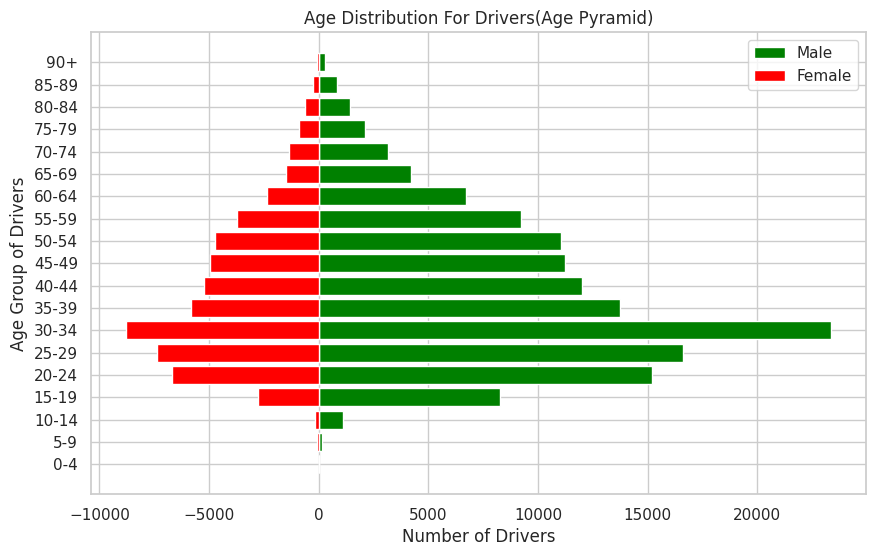

In [ ]:



age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
               '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+']

# Create age groups based on bins
visual_df['Age Group'] = pd.cut(visual_df['age_of_driver'], bins=age_bins, labels=age_labels, right=False)

# Count the number of individuals in each age group
age_group_counts = visual_df['Age Group'].value_counts().sort_index()

male_driver = visual_df.loc[visual_df['sex_of_driver'] == 1, 'Age Group'].value_counts().sort_index()
female_driver = -visual_df.loc[visual_df['sex_of_driver'] == 2, 'Age Group'].value_counts().sort_index()


# Create the age pyramid using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for males on the left side
ax.barh(age_group_counts.index, male_driver.values, color='green', label='Male', align='center')

# Plotting bars for females on the right side with negative values to place them on the right
ax.barh(age_group_counts.index, female_driver.values, color='red', label='Female', align='center')

# Adding labels and title
plt.xlabel('Number of Drivers')
plt.ylabel('Age Group of Drivers')
plt.title('Age Distribution For Drivers(Age Pyramid)')
plt.legend()


plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


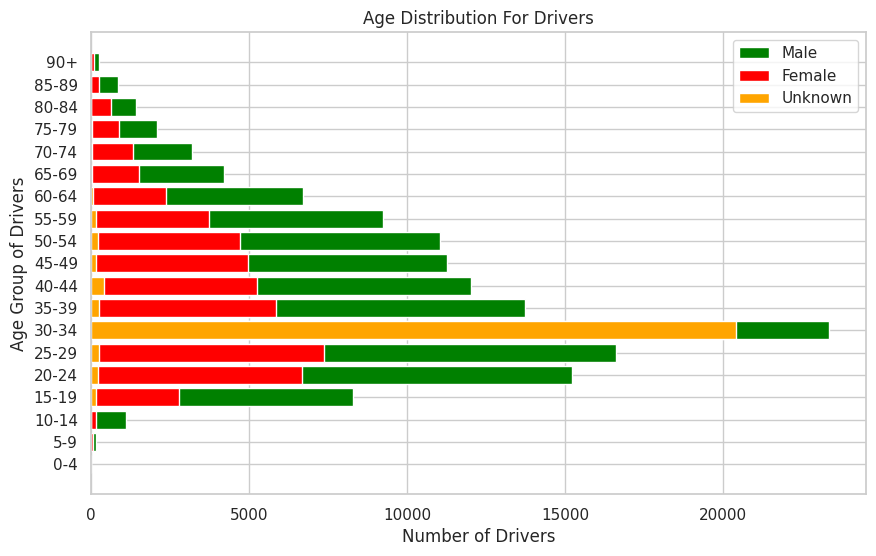

In [ ]:
female_driver = visual_df.loc[visual_df['sex_of_driver'] == 2, 'Age Group'].value_counts().sort_index()
unknown_driver = visual_df.loc[visual_df['sex_of_driver'] == 3, 'Age Group'].value_counts().sort_index()

# Create the age pyramid using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for males
ax.barh(age_group_counts.index, male_driver.values, color='green', label='Male', align='center')

# Plotting bars for females
ax.barh(age_group_counts.index, female_driver.values, color='red', label='Female', align='center')

# Plotting bars for unknown
ax.barh(age_group_counts.index, unknown_driver.values, color='orange', label='Unknown', align='center')

# Adding labels and title
plt.xlabel('Number of Drivers')
plt.ylabel('Age Group of Drivers')
plt.title('Age Distribution For Drivers')
plt.legend()

# Display the age pyramid
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


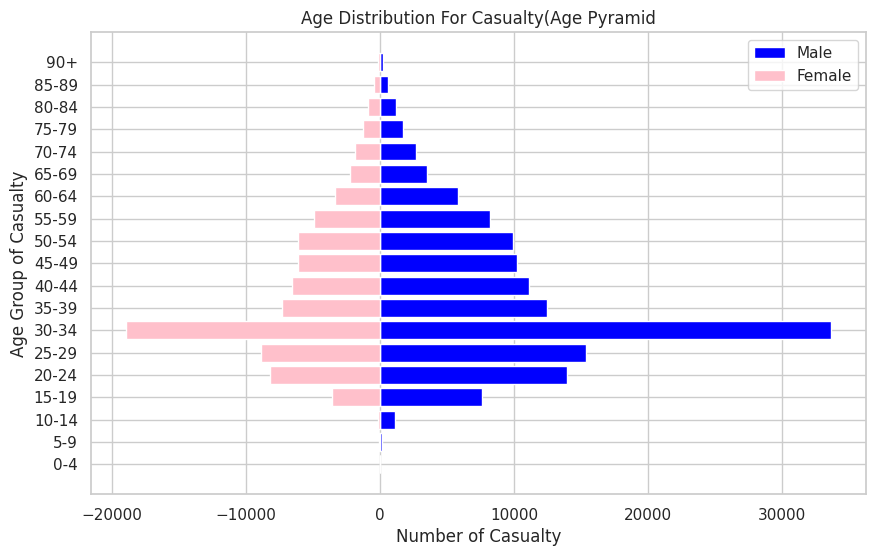

In [ ]:


male_casual = visual_df.loc[visual_df['sex_of_casualty'] == 1, 'Age Group'].value_counts().sort_index()
female_casual = -visual_df.loc[visual_df['sex_of_casualty'] == 2, 'Age Group'].value_counts().sort_index()


# Create the age pyramid using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for males on the left side
ax.barh(age_group_counts.index, male_casual.values, color='blue', label='Male', align='center')

# Plotting bars for females on the right side with negative values to place them on the right
ax.barh(age_group_counts.index, female_casual.values, color='pink', label='Female', align='center')


# Adding labels and title
plt.xlabel('Number of Casualty')
plt.ylabel('Age Group of Casualty')
plt.title('Age Distribution For Casualty(Age Pyramid')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


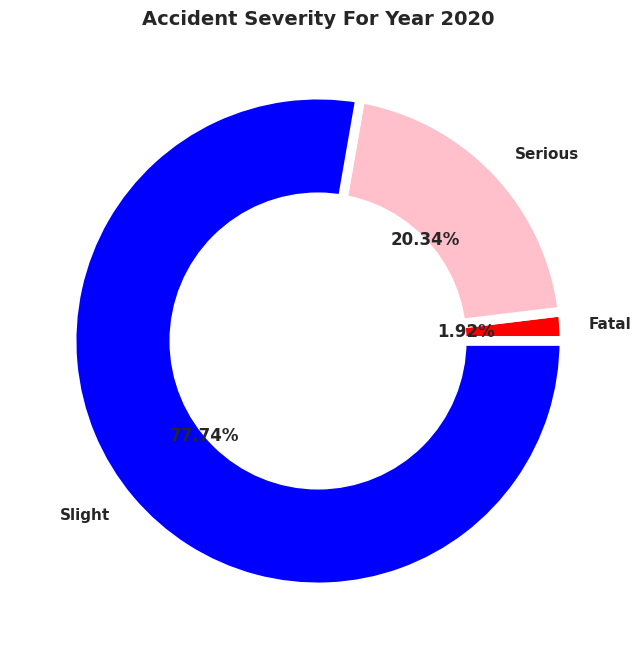

In [ ]:
visual_df.accident_severity.replace({1:"Fatal",
                              2:"Serious",
                              3:"Slight"},
                              inplace=True)

fatal   = visual_df.accident_severity.value_counts()['Fatal']
serious = visual_df.accident_severity.value_counts()['Serious']
slight  = visual_df.accident_severity.value_counts()['Slight']
size  = [fatal, serious, slight]
label = ['Fatal', 'Serious', 'Slight']


plt.pie(x=size, labels=label, colors=['red', 'pink', 'blue'],
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})


my_circle = plt.Circle((0,0), 0.6, color='white')


fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('Accident Severity For Year 2020', fontsize=14, fontweight='bold')
plt.show()

## 1. Are there significant hours of the day, and days of the week, on which accidents occur?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


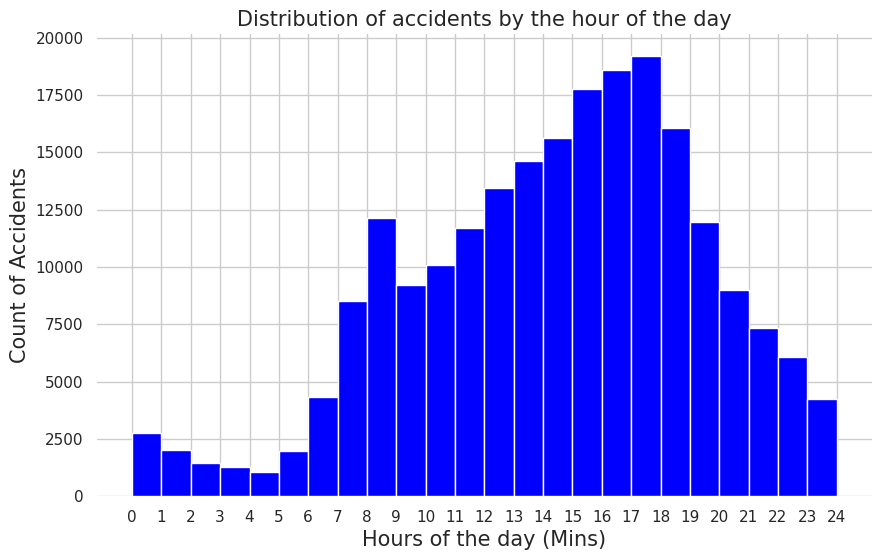

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))
visual_df.hour.hist(bins=24, range=(0, 24), ax=ax, color='blue')
ax.set_xticks(range(25))
ax.set_xlabel('Hours of the day (Mins)', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents by the hour of the day', fontsize = 15)
sns.despine(top=True, right=True, left=True, bottom=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


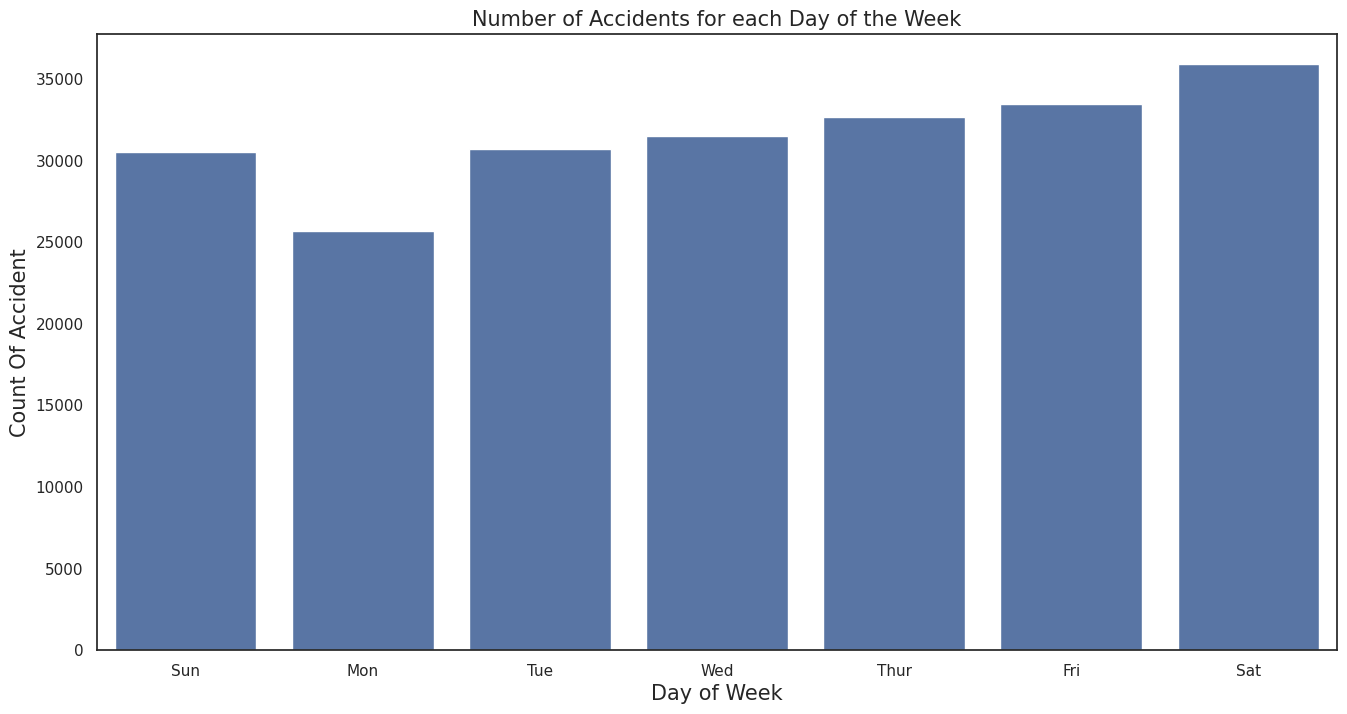

In [ ]:
visual_df.day_of_week.replace({1:"Mon", 2:"Tue", 3:"Wed", 4:"Thur", 5:"Fri", 6:"Sat", 7:"Sun"}, inplace=True)
day = ['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
plt.figure(figsize = (16, 8))
sns.countplot(x=visual_df.day_of_week, order=day)
#plt.plot(vsu_df.day_of_week, linestyle=':', color='c')
plt.title("Number of Accidents for each Day of the Week",fontsize = 15)
plt.xlabel("Day of Week",fontsize = 15)
plt.ylabel("Count Of Accident",fontsize = 15)
plt.show()

## 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-181-234e44934fca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorbike.vehicle_type.replace({2:"Motorcycle 125cc and under",
<ipython-input-181-234e44934fca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorbike.day_of_week.rep

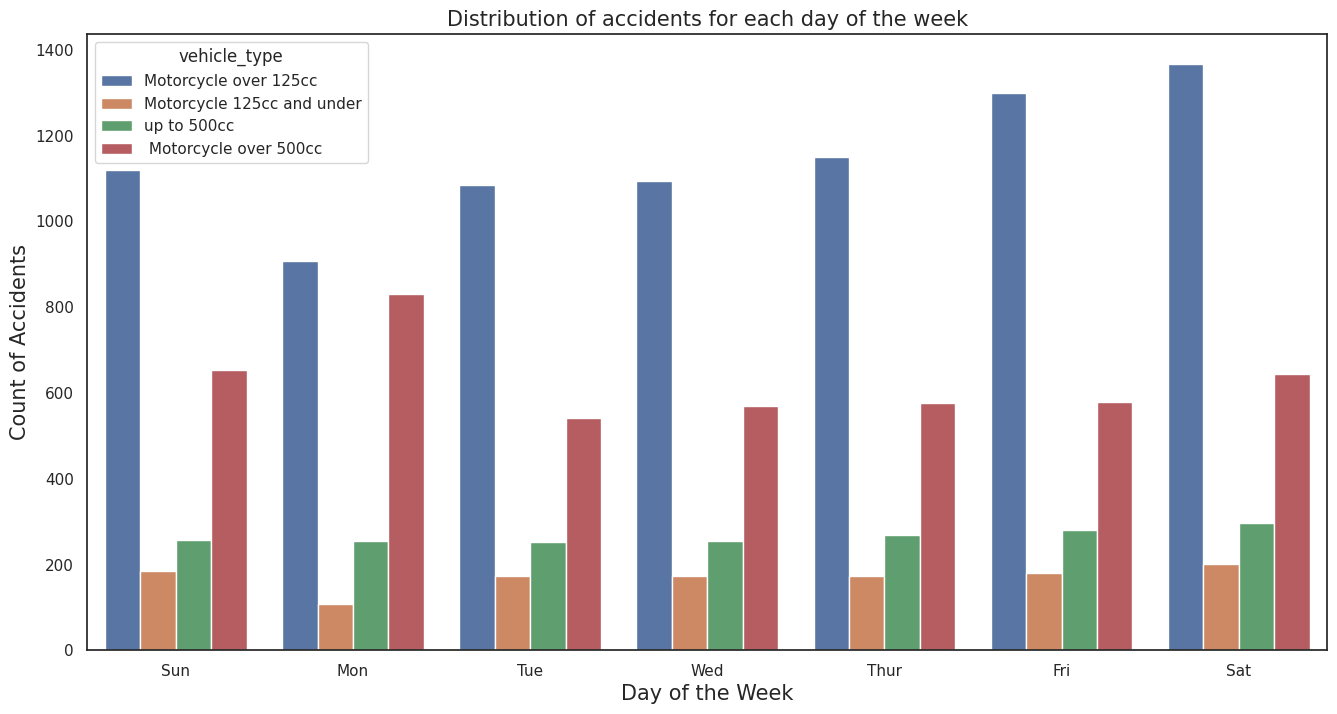

In [ ]:

motorbike = accident_df[(accident_df["vehicle_type"] == 2) | (accident_df["vehicle_type"] == 3) |
                        (accident_df["vehicle_type"] == 4) | (accident_df["vehicle_type"] == 5)]
motorbike.vehicle_type.replace({2:"Motorcycle 125cc and under",
                               3:"Motorcycle over 125cc",
                                4:"up to 500cc", 5:" Motorcycle over 500cc"}, inplace=True)
motorbike.day_of_week.replace({1:"Mon", 2:"Tue", 3:"Wed", 4:"Thur", 5:"Fri", 6:"Sat", 7:"Sun"}, inplace=True)
day = ['Sun','Mon','Tue','Wed','Thur','Fri','Sat']

plt.figure(figsize=(16,8))
ax = sns.countplot(data=motorbike, x='day_of_week', hue='vehicle_type', order=day)
ax.set_xlabel('Day of the Week', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents for each day of the week', fontsize = 15)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


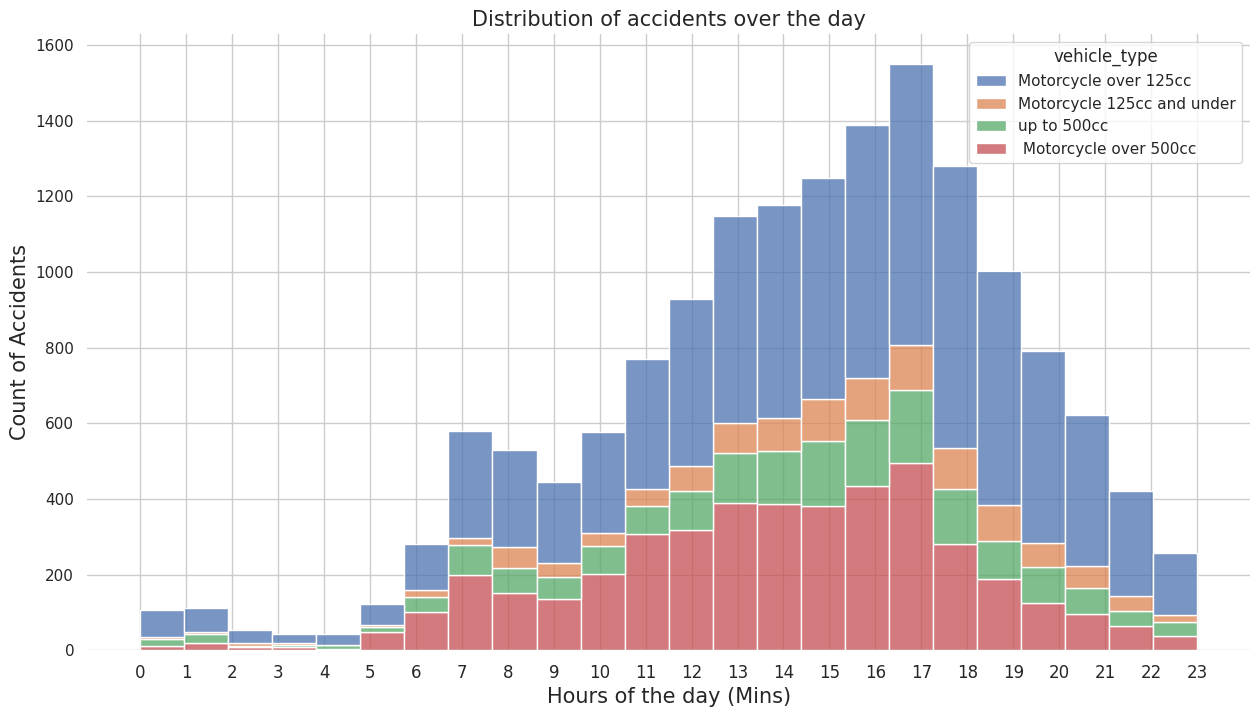

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(x="hour", multiple="stack", hue="vehicle_type", data=motorbike, bins=24)
plt.xticks(range(0, 24), fontsize=12)
ax.set_xlabel('Hours of the day (Mins)', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents over the day', fontsize = 15)
sns.despine(top=True, right=True, left=True, bottom=True)

### 3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


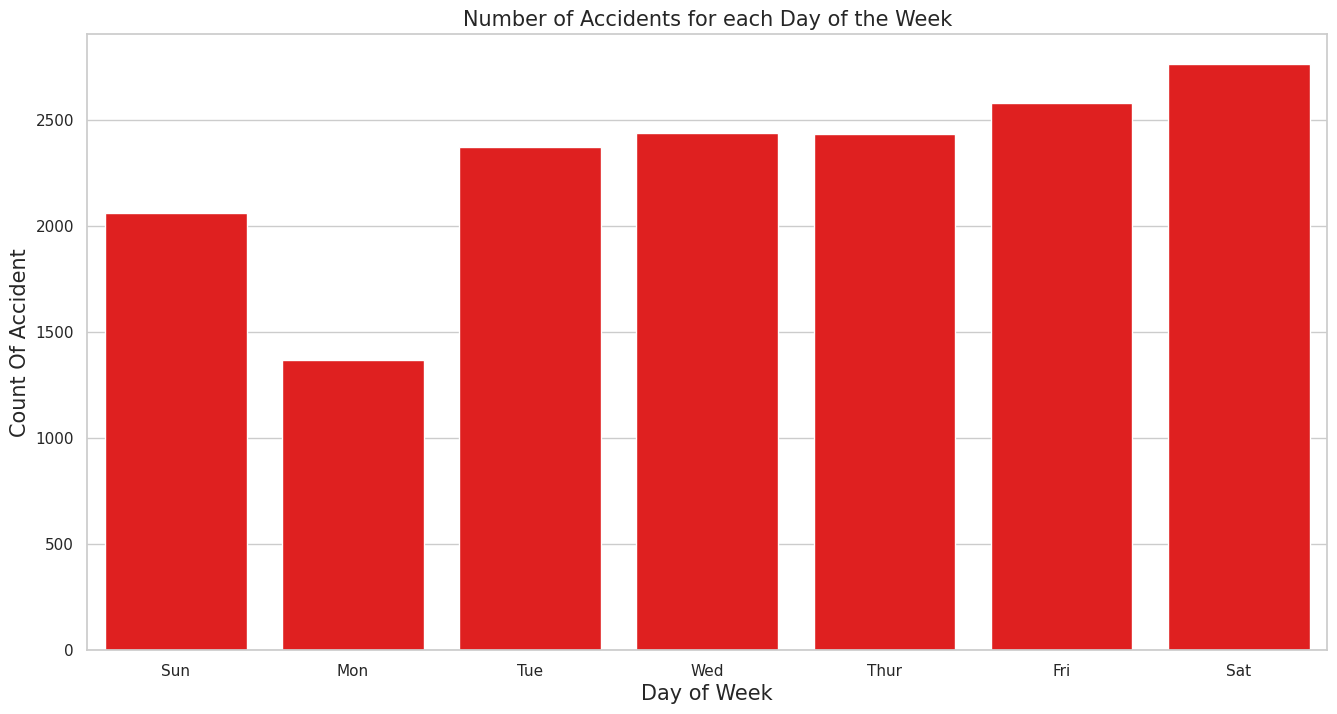

In [ ]:
visual_df.casualty_class.replace({1:"Driver/Rider", 2:"Vehicle or pillion passenger", 3:"Pedestrian"}, inplace=True)

pedestrian = visual_df[visual_df.casualty_class == "Pedestrian"]

day = ['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
plt.figure(figsize = (16, 8))
sns.countplot(x=pedestrian.day_of_week, order=day, color="red")
#plt.plot(vsu_df.day_of_week, linestyle=':', color='c')
plt.title("Number of Accidents for each Day of the Week",fontsize = 15)
plt.xlabel("Day of Week",fontsize = 15)
plt.ylabel("Count Of Accident",fontsize = 15)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


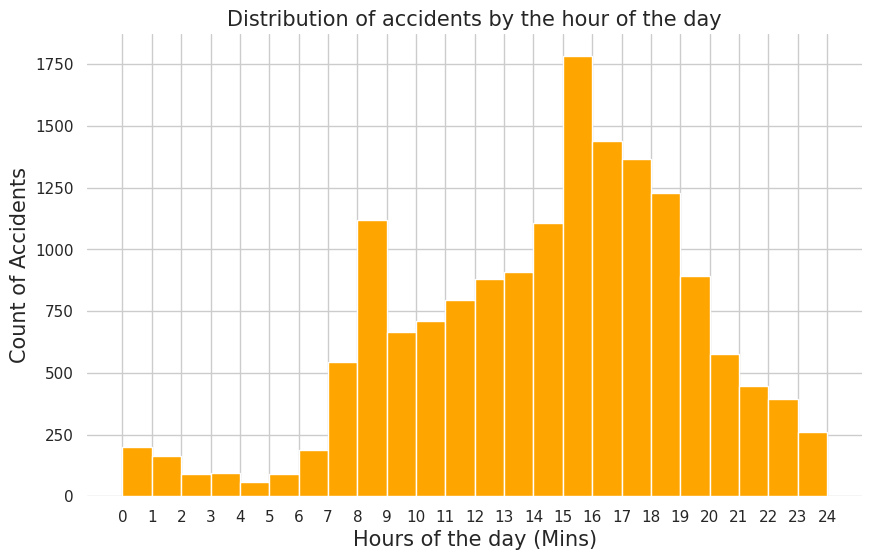

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))
pedestrian.hour.hist(bins=24, range=(0, 24), ax=ax, color='orange')
ax.set_xticks(range(25))
ax.set_xlabel('Hours of the day (Mins)', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents by the hour of the day', fontsize = 15)
sns.despine(top=True, right=True, left=True, bottom=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


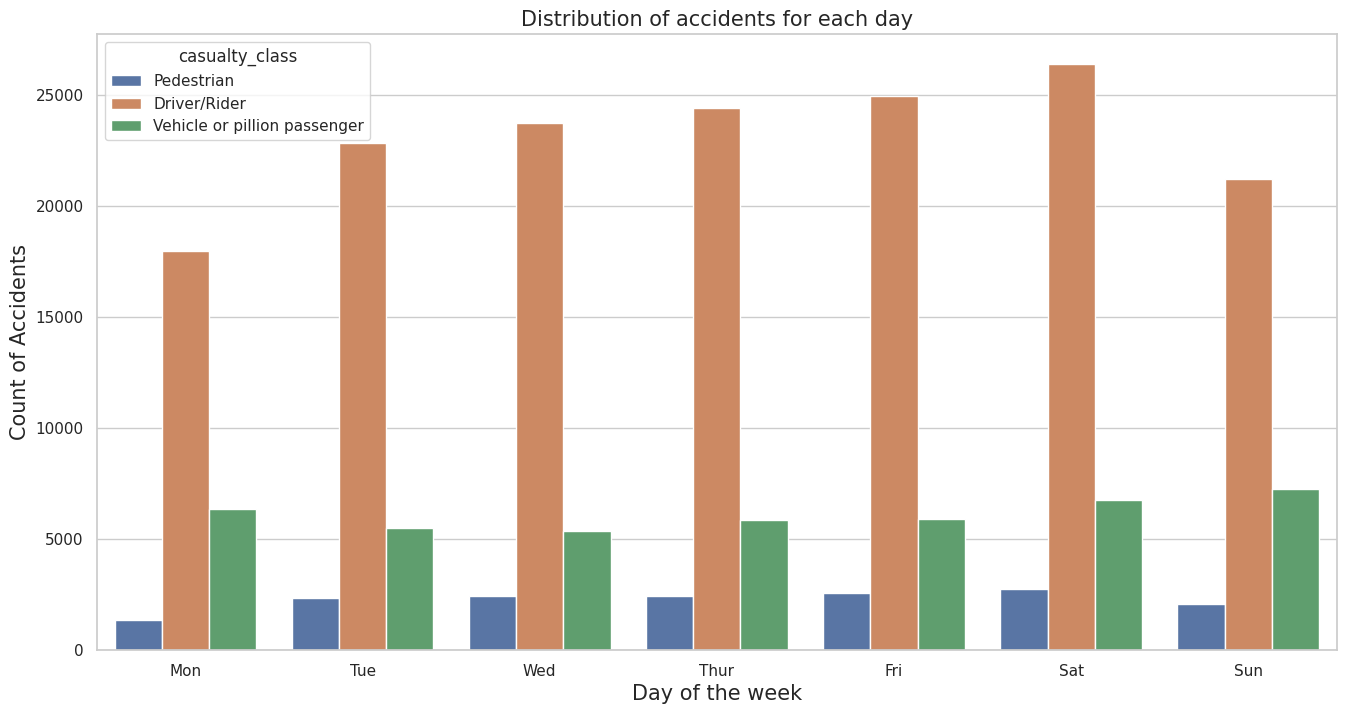

In [ ]:
visual_df.casualty_class.replace({1:"Driver/Rider", 2:"Vehicle or pillion passenger", 3:"Pedestrian"}, inplace=True)
day = ['Mon','Tue','Wed','Thur','Fri','Sat', 'Sun']
plt.figure(figsize=(16,8))
ax = sns.countplot(data=visual_df, x='day_of_week', hue='casualty_class', order=day)
ax.set_xlabel('Day of the week', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents for each day', fontsize = 15)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


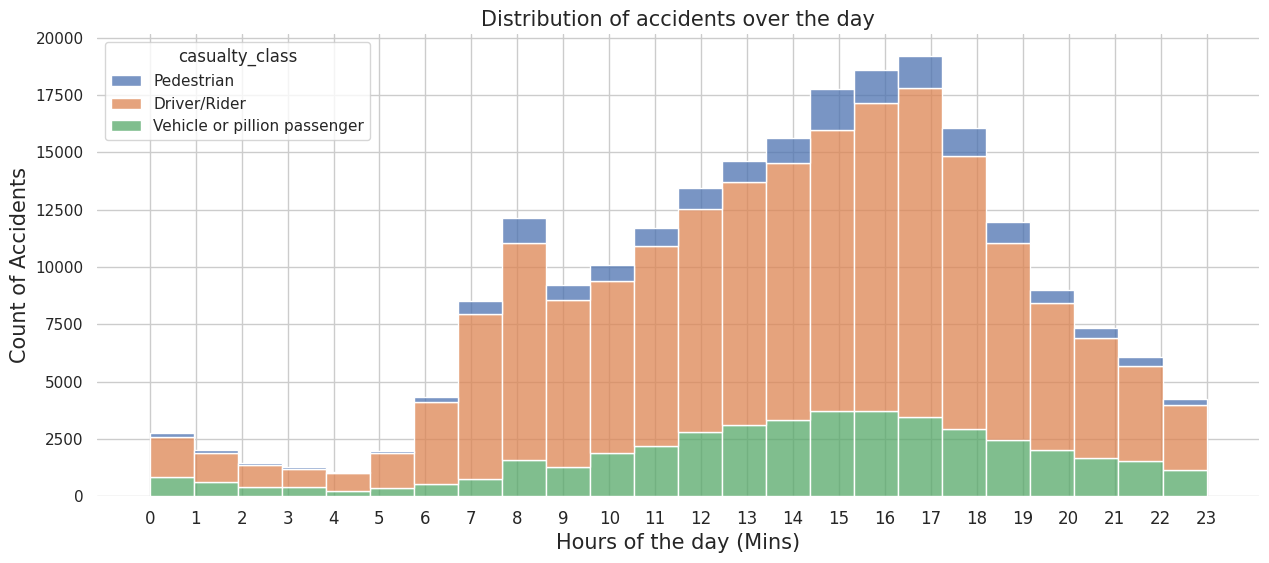

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x="hour", multiple="stack", hue="casualty_class", data=visual_df, bins=24)
plt.xticks(range(0, 24), fontsize=12)
ax.set_xlabel('Hours of the day (Mins)', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents over the day', fontsize = 15)
sns.despine(top=True, right=True, left=True, bottom=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


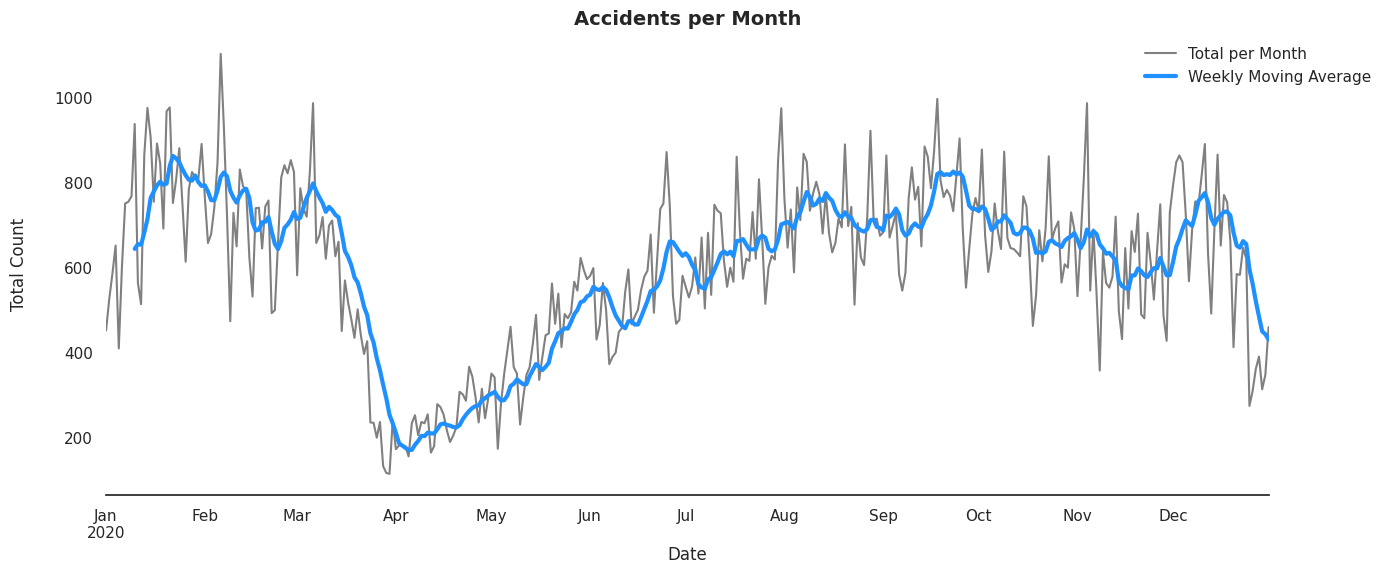

In [ ]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
visual_df.set_index('date').resample('D').size().plot(label='Total per Month', color='grey', ax=ax)
visual_df.set_index('date').resample('D').size().rolling(window=10).mean().plot(color='dodgerblue', linewidth=3, label='Weekly Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='Date')
ax.legend(bbox_to_anchor=(1.1, 1.0), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)

## 4. Using the apriori algorithm, explore the impact of selected variables on accident severity.  

In [ ]:

from mlxtend.frequent_patterns import apriori, association_rules

Select variables that are correlated and are highly factor to accident severity

In [ ]:
apr_df = accident_df[['accident_severity', 'speed_limit', 'weather_conditions', 'casualty_severity']]
apr_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_severity  speed_limit  weather_conditions  casualty_severity
0                  3         20.0                 9.0                  3
1                  3         20.0                 1.0                  3
2                  3         20.0                 1.0                  3
3                  3         30.0                 1.0                  3
4                  2         30.0                 1.0                  2

With pd.get_dummies apply One-hot encoding to get uniques values accross slected columns

In [ ]:
one_hot = pd.get_dummies(apr_df, columns=['accident_severity', 'speed_limit', 'weather_conditions', 'casualty_severity'], prefix=apr_df.columns).astype(int)
one_hot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_severity_1  accident_severity_2  accident_severity_3  \
0                    0                    0                    1   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    0                    1   
4                    0                    1                    0   

   speed_limit_20.0  speed_limit_30.0  speed_limit_40.0  speed_limit_50.0  \
0                 1                 0                 0                 0   
1                 1                 0                 0                 0   
2                 1                 0                 0                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   speed_limit_60.0  speed_limit_70.0  weather_conditions_1.0  \
0                 0                 0                       0   
1                 0                 0                       1   
2                 0                 0                       1   
3                 0                 0                       1   
4                 0                 0                       1   

   weather_conditions_2.0  weather_conditions_3.0  weather_conditions_4.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   weather_conditions_5.0  weather_conditions_6.0  weather_conditions_7.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   weather_conditions_8.0  weather_conditions_9.0  casualty_severity_1  \
0                       0                       1                    0   
1                       0                       0                    0   
2                       0                       0                    0   
3                       0                       0                    0   
4                       0                       0                    0   

   casualty_severity_2  casualty_severity_3  
0                    0                    1  
1                    0                    1  
2                    0                    1  
3                    0                    1  
4                    1                    0

In [ ]:
one_hot.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


(220435, 21)

Using the minimum support threshold of 0.2 for an itemset to be considered frequent i.e the 20% proportion of transactions in the dataset that is contained in the transactions will be considered frequent.

In [ ]:
freq_apri = apriori(one_hot, min_support=0.2, use_colnames=True)
freq_apri.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                  itemsets
0  0.203362     (accident_severity_2)
1  0.777445     (accident_severity_3)
2  0.542663        (speed_limit_30.0)
3  0.780892  (weather_conditions_1.0)
4  0.828067     (casualty_severity_3)

In [ ]:
freq_apri

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


support                                           itemsets
0   0.203362                              (accident_severity_2)
1   0.777445                              (accident_severity_3)
2   0.542663                                 (speed_limit_30.0)
3   0.780892                           (weather_conditions_1.0)
4   0.828067                              (casualty_severity_3)
5   0.439218            (accident_severity_3, speed_limit_30.0)
6   0.604246      (accident_severity_3, weather_conditions_1.0)
7   0.777445         (casualty_severity_3, accident_severity_3)
8   0.428376         (weather_conditions_1.0, speed_limit_30.0)
9   0.457899            (casualty_severity_3, speed_limit_30.0)
10  0.642961      (casualty_severity_3, weather_conditions_1.0)
11  0.345013  (accident_severity_3, weather_conditions_1.0, ...
12  0.439218  (casualty_severity_3, accident_severity_3, spe...
13  0.604246  (casualty_severity_3, accident_severity_3, wea...
14  0.359784  (casualty_severity_3, weather_conditions_1.0, ...
15  0.345013  (casualty_severity_3, accident_severity_3, wea...

Using the lift metrics, what are the possiblities that the antecedents and the consequents occuring more often, and using a threshold of 0.5 we selected the once that are closely equal or greater than 1

In [ ]:
ass = association_rules(freq_apri, metric = "lift", min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


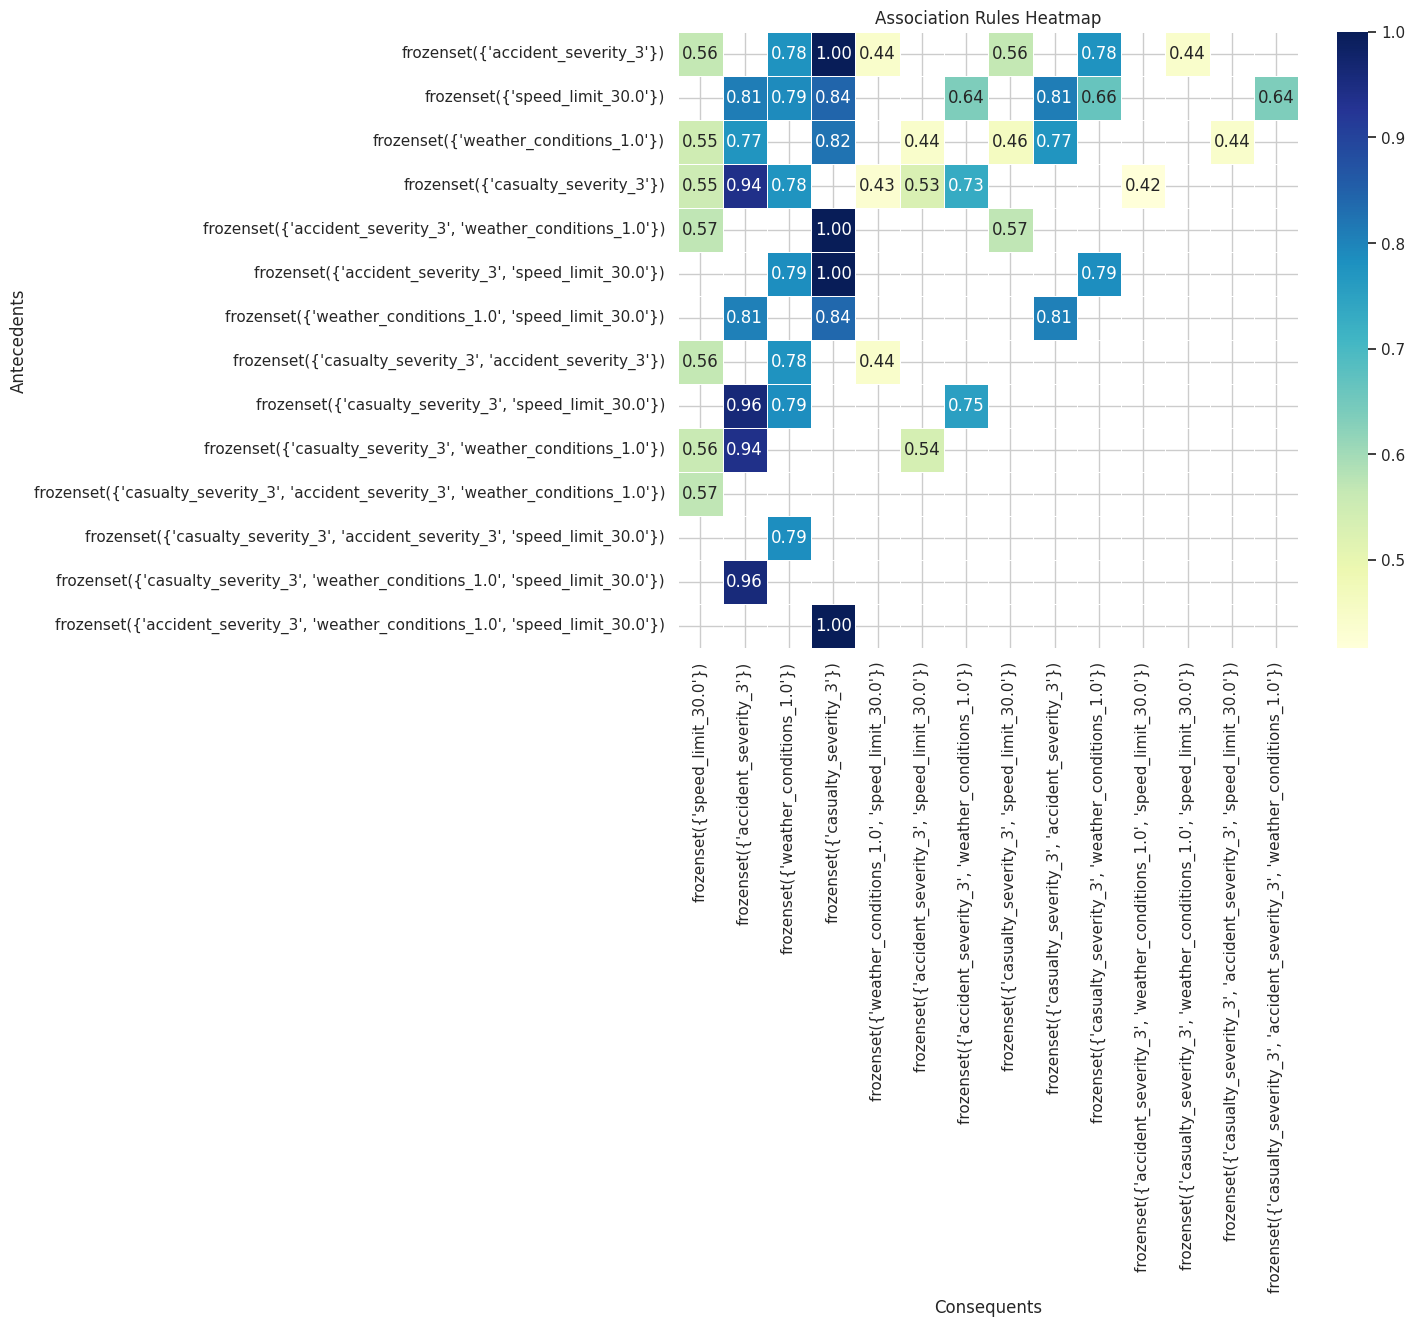

In [ ]:
heatmap_data = ass.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Association Rules Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

## 5. Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?


In [ ]:
k_df = accident_df[(accident_df['lsoa01nm'].str.contains("Kingston upon Hull")) |
          (accident_df['lsoa01nm'].str.contains("Humberside")) |
          (accident_df['lsoa01nm'].str.contains("East Riding of Yorkshire"))]

k_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


(2467, 89)

## Using KMeans Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


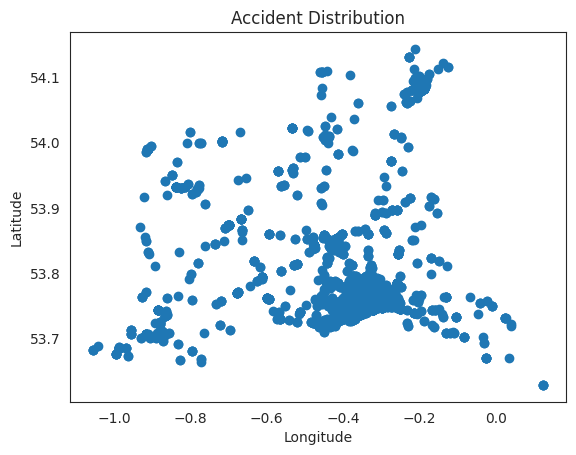

In [ ]:

from sklearn.cluster import KMeans

map = k_df[['longitude', 'latitude']]

#wcss = []
#for k in range(25, 80):
#    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df)
#    wcss.append(kmeans.inertia_)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(map)

plt.scatter(map['longitude'], map['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Distribution')
plt.show()

/tmp/ipykernel_1352/767724331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map['label'] = kmeans.labels_


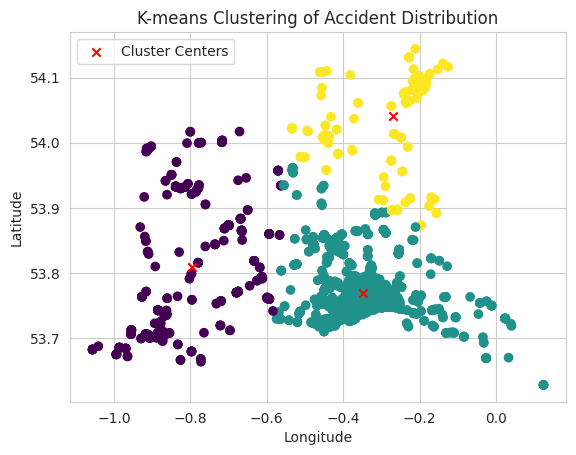

In [ ]:

centers = kmeans.cluster_centers_
map['label'] = kmeans.labels_

plt.scatter(map['longitude'], map['latitude'], c=map.label, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Accident Distribution')
plt.legend()
plt.show()

In [ ]:
uk_region = [53.746263, -0.339913]#[54.7023545, -3.2765753]
uk_map = folium.Map(location=uk_region, zoom_start=9)
#uk_map

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
colors = ["green", "blue", "red"]#, "pink", "orange"]
for i in range(0,len(map)):
  folium.CircleMarker(
        location=[map.iloc[i]['latitude'], map.iloc[i]['longitude']],
        radius=5,
        color=colors[int(map.iloc[i]['label'])],
        fill=True,
        fill_color=colors[int(map.iloc[i]['label'])]
    ).add_to(uk_map)

uk_map

## Using KMedoids

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-119-f9e77cf30075>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_map['label'] = kmeans.labels_


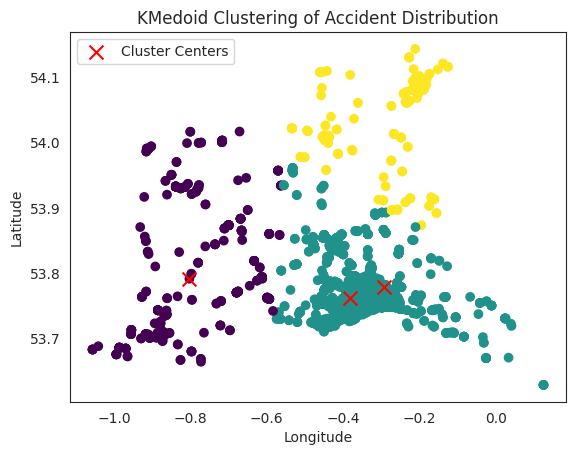

In [ ]:
k_map = k_df[['longitude', 'latitude']]
kmedoid = KMedoids(n_clusters=3)
kmedoid.fit(k_map)

point = kmedoid.cluster_centers_
k_map['label'] = kmeans.labels_

plt.scatter(k_map['longitude'], k_map['latitude'], c=k_map.label, cmap='viridis')
plt.scatter(point[:, 0], point[:, 1],  marker='x', s = 100, color='red', label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMedoid Clustering of Accident Distribution')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


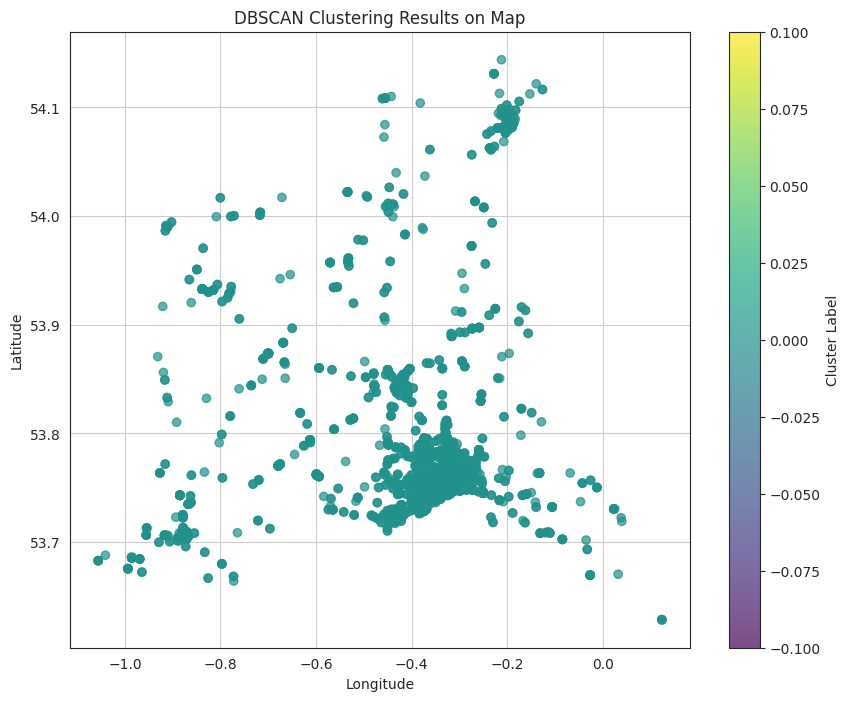

In [ ]:
s_map = k_df[['longitude', 'latitude']]
db_scan = DBSCAN(eps = 0.5, min_samples= 3, metric= "euclidean")
db_scan.fit(s_map)


# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(s_map['longitude'], s_map['latitude'], c=db_scan.labels_, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering Results on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

## 6. Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?

In [ ]:
column = ['police_force', 'number_of_vehicles',
       'number_of_casualties', 'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail',
       'second_road_class', 'second_road_number',
       'light_conditions',
       'road_surface_conditions',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident'
       ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
cols = []
for i in column:
  if (accident_df[i].dtype == 'int64') or (accident_df[i].dtype =='float64'):
    cols.append(i)
cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


['police_force',
 'number_of_vehicles',
 'number_of_casualties',
 'local_authority_district',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'second_road_class',
 'second_road_number',
 'light_conditions',
 'road_surface_conditions',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


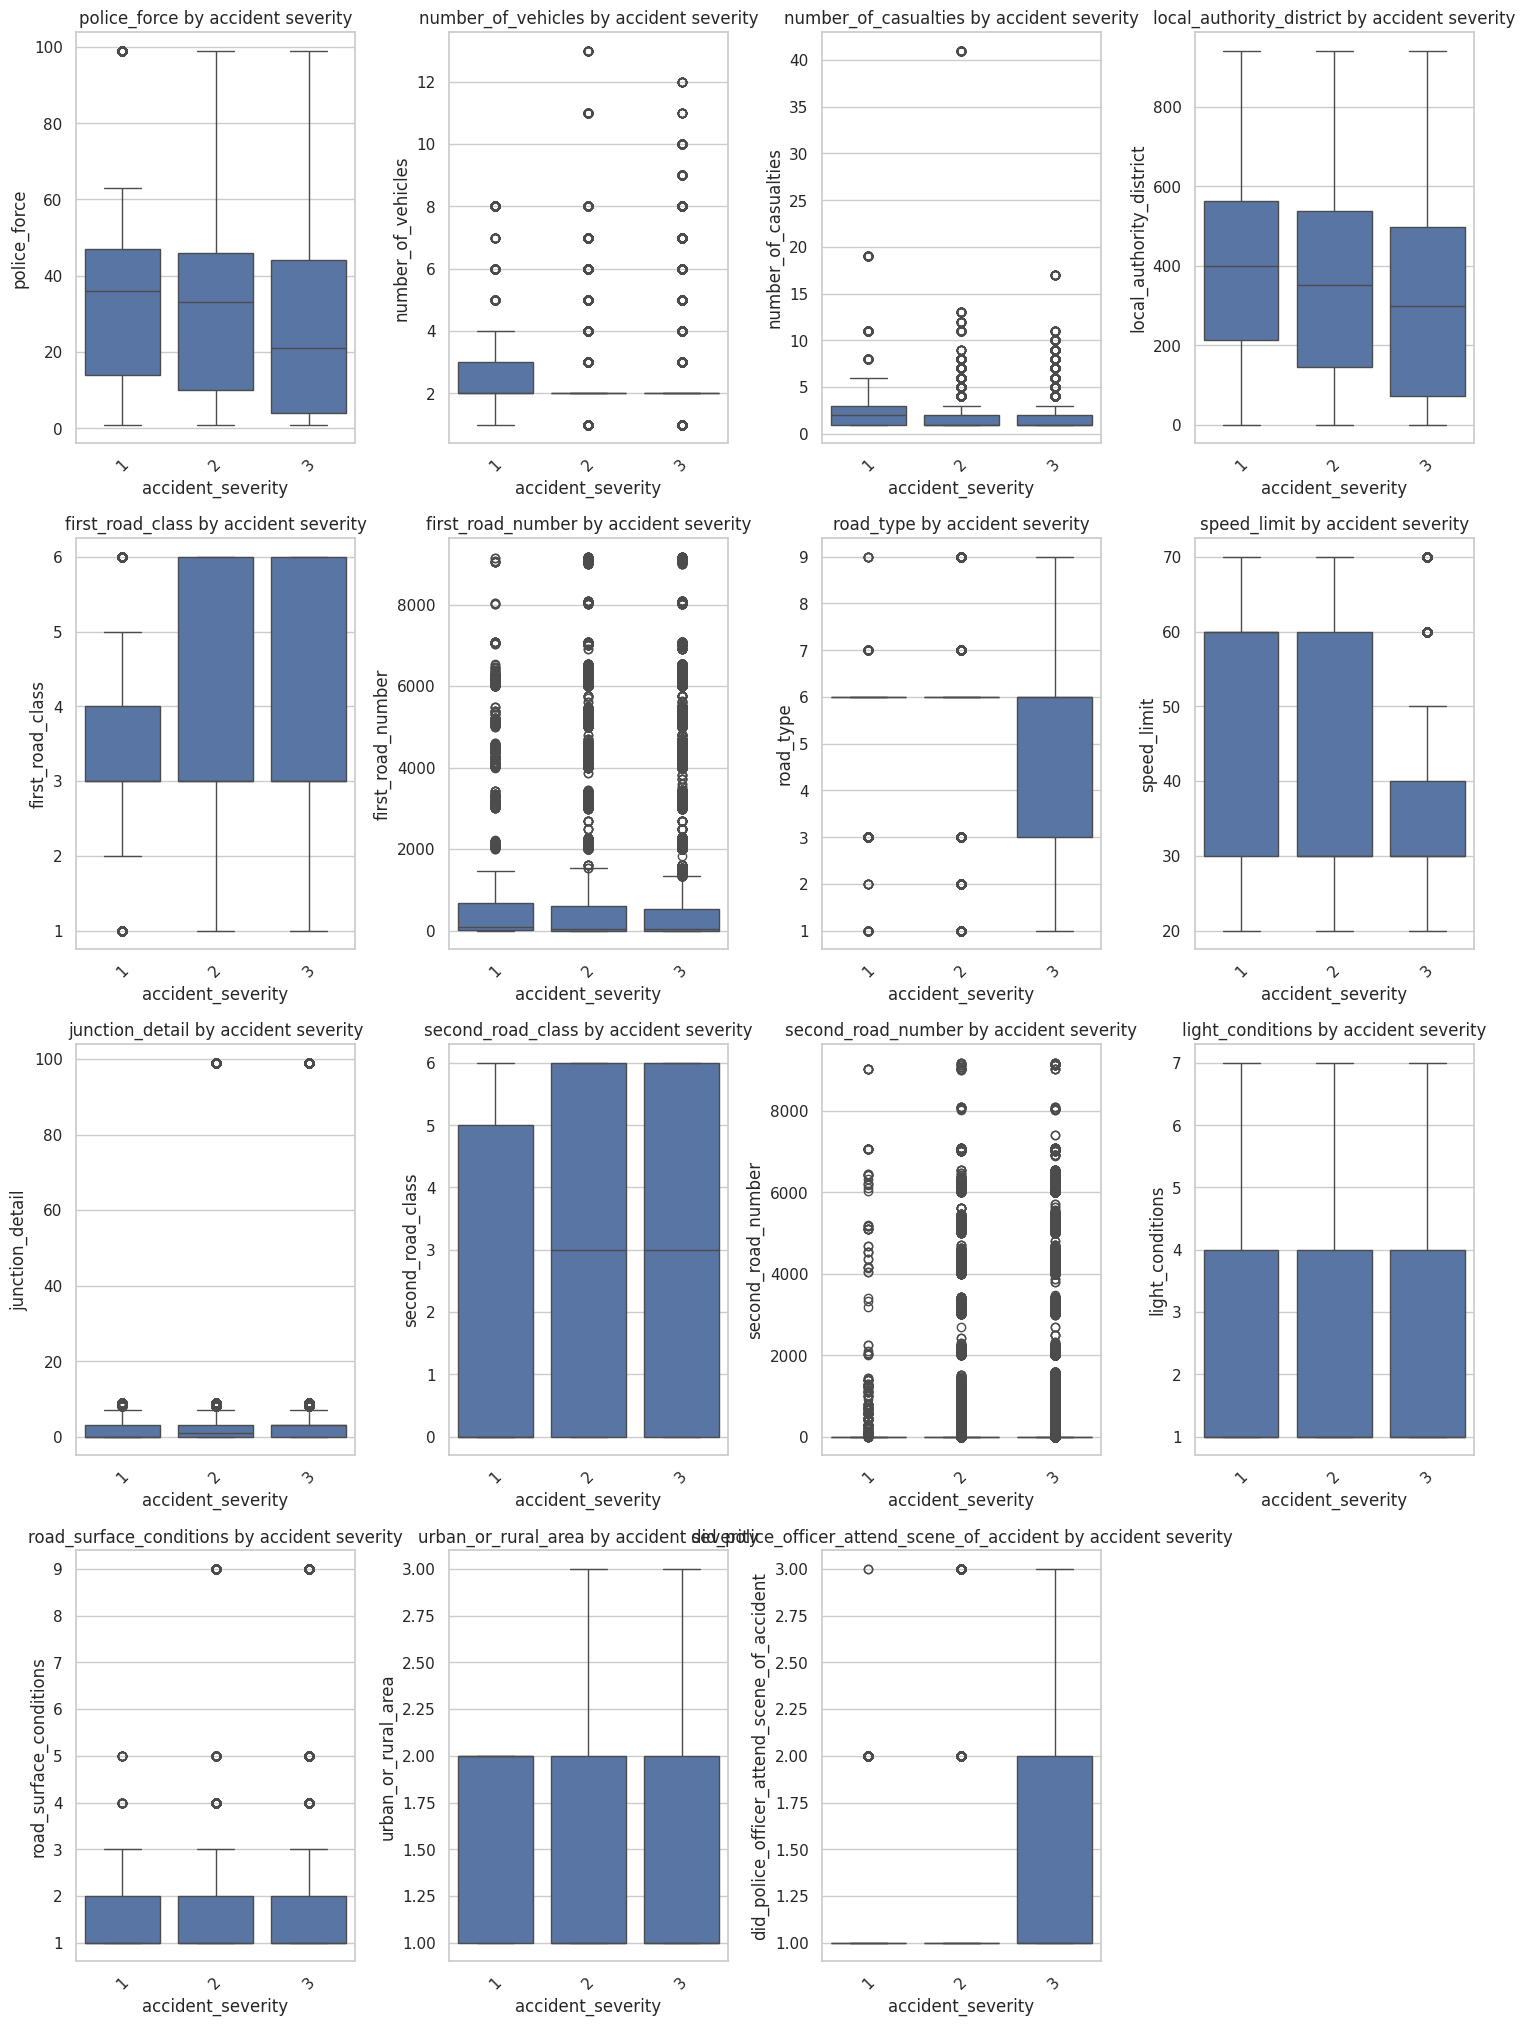

In [ ]:
# Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?

#fig, axes = plt.subplots(1, len(cols), figsize=(20, 30))

plt.figure(figsize=(15, 30))
# Iterate through each column and create a boxplot
for i, col in enumerate(cols, start=1):
  if col in cols:
    plt.subplot(6,4,i)
    sns.boxplot(x='accident_severity', y=col, data=accident_df)#, label=col)
    plt.title(f'{col} by accident severity')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
cols = ['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'hour', 'min',
       'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile',
       'vehicle_type', 'towing_and_articulation', 'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'engine_capacity_cc', 'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'lsoa01nm', 'shape__area', 'shape__length']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
new_df = accident_df[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:

from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
new_df.lsoa01nm = label_encoder.fit_transform(new_df.lsoa01nm)
new_df.generic_make_model = label_encoder.fit_transform(new_df.generic_make_model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-213-8347e881448c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.lsoa01nm = label_encoder.fit_transform(new_df.lsoa01nm)
<ipython-input-213-8347e881448c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
def detect_outliers_iqr(df, columns, threshold=1.5):
    outliers = pd.DataFrame()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        col_outliers['Outlier_Column'] = col
        outliers = pd.concat([outliers, col_outliers])
    return outliers

outliers = detect_outliers_iqr(new_df, columns=cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-214-e3401788fd0e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_outliers['Outlier_Column'] = col
<ipython-input-214-e3401788fd0e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
outliers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


location_easting_osgr  location_northing_osgr  longitude   latitude  \
186298               163544.0                 40644.0  -5.316043  50.218424   
186299               163544.0                 40644.0  -5.316043  50.218424   
186300               163544.0                 40644.0  -5.316043  50.218424   
186301               163544.0                 40644.0  -5.316043  50.218424   
186302               163544.0                 40644.0  -5.316043  50.218424   

        police_force  accident_severity  number_of_vehicles  \
186298            50                  2                   3   
186299            50                  2                   3   
186300            50                  2                   3   
186301            50                  2                   3   
186302            50                  2                   3   

        number_of_casualties  day_of_week  hour  min  first_road_class  \
186298                     3            7    19   36                 3   
186299                     3            7    19   36                 3   
186300                     3            7    19   36                 3   
186301                     3            7    19   36                 3   
186302                     3            7    19   36                 3   

        first_road_number  road_type  speed_limit  junction_detail  \
186298                 30          3         70.0              0.0   
186299                 30          3         70.0              0.0   
186300                 30          3         70.0              0.0   
186301                 30          3         70.0              0.0   
186302                 30          3         70.0              0.0   

        junction_control  second_road_class  second_road_number  \
186298               4.0                0.0                 0.0   
186299               4.0                0.0                 0.0   
186300               4.0                0.0                 0.0   
186301               4.0                0.0                 0.0   
186302               4.0                0.0                 0.0   

        pedestrian_crossing_human_control  \
186298                                0.0   
186299                                0.0   
186300                                0.0   
186301                                0.0   
186302                                0.0   

        pedestrian_crossing_physical_facilities  light_conditions  \
186298                                      0.0               6.0   
186299                                      0.0               6.0   
186300                                      0.0               6.0   
186301                                      0.0               6.0   
186302                                      0.0               6.0   

        weather_conditions  road_surface_conditions  \
186298                 1.0                      1.0   
186299                 1.0                      1.0   
186300                 1.0                      1.0   
186301                 1.0                      1.0   
186302                 1.0                      1.0   

        special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
186298                         0.0                  0.0                    1   
186299                         0.0                  0.0                    1   
186300                         0.0                  0.0                    1   
186301                         0.0                  0.0                    1   
186302                         0.0                  0.0                    1   

        did_police_officer_attend_scene_of_accident  trunk_road_flag  \
186298                                          1.0              1.0   
186299                                          1.0              1.0   
186300                                          1.0              1.0   
186301                                          1.0              1.0   
186302                     

In [ ]:
from scipy.special import erfc
def chauvenet(df):
    mean = df.mean()
    stdv = df.std()
    N = len(df)
    criterion = 1.0/(2*N)
    d = abs(df-mean)/stdv
    prob = erfc(d)
    outliers = prob < criterion
    return df[~outliers]

new_df = chauvenet(new_df)
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


location_easting_osgr  location_northing_osgr  longitude   latitude  \
0               521389.0                175144.0  -0.254001  51.462262   
1               529337.0                176237.0  -0.139253  51.470327   
2               529337.0                176237.0  -0.139253  51.470327   
3               526432.0                182761.0  -0.178719  51.529614   
4               538676.0                184371.0  -0.001683  51.541210   

   police_force  accident_severity  number_of_vehicles  number_of_casualties  \
0             1                3.0                 1.0                   1.0   
1             1                3.0                 1.0                   2.0   
2             1                3.0                 1.0                   2.0   
3             1                3.0                 1.0                   1.0   
4             1                2.0                 1.0                   1.0   

   day_of_week  hour  min  first_road_class  first_road_number  road_type  \
0            3     9    0                 6                0.0          6   
1            2    13   55                 3             3036.0          6   
2            2    13   55                 3             3036.0          6   
3            4     1   25                 5                0.0          6   
4            4     1   50                 3               11.0          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0         20.0              0.0               4.0                0.0   
1         20.0              9.0               2.0                6.0   
2         20.0              9.0               2.0                6.0   
3         30.0              3.0               1.0                6.0   
4         30.0              0.0               4.0                0.0   

   second_road_number  pedestrian_crossing_human_control  \
0                 0.0                                NaN   
1                 0.0                                0.0   
2                 0.0                                0.0   
3                 0.0                                0.0   
4                 0.0                                0.0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                      NaN               1.0   
1                                      4.0               1.0   
2                                      4.0               1.0   
3                                      0.0               4.0   
4                                      4.0               4.0   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                 NaN                      NaN                         0.0   
1                 1.0                      1.0                         0.0   
2                 1.0                      1.0                         0.0   
3                 1.0                      2.0                         0.0   
4                 1.0                      1.0                         0.0   

   carriageway_hazards  urban_or_rural_area  \
0                  0.0                  1.0   
1                  0.0                  1.0   
2                  0.0                  1.0   
3                  0.0                  1.0   
4                  0.0                  1.0   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                          3.0              2.0   
1                                          1.0              2.0   
2                                          1.0              2.0   
3                                          1.0              2.0   
4                                          1.0              2.0   

   casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0               3              1.0             31.0                   6.0   
1               3              2.0              2.0                   1.0   
2               3              2.0              4

In [ ]:
new_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


(220435, 63)

In [ ]:
new_df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


location_easting_osgr                             59
location_northing_osgr                          1084
longitude                                         64
latitude                                        1075
police_force                                       0
accident_severity                               4231
number_of_vehicles                              2597
number_of_casualties                            1785
day_of_week                                        0
hour                                               0
min                                                0
first_road_class                                   0
first_road_number                               3798
road_type                                          0
speed_limit                                        0
junction_detail                                 3017
junction_control                                3000
second_road_class                                  0
second_road_number                            

In [ ]:
new_df = new_df.drop_duplicates()
new_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


(219762, 63)

In [ ]:
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


location_easting_osgr  location_northing_osgr  longitude   latitude  \
0               521389.0                175144.0  -0.254001  51.462262   
1               529337.0                176237.0  -0.139253  51.470327   
2               529337.0                176237.0  -0.139253  51.470327   
3               526432.0                182761.0  -0.178719  51.529614   
4               538676.0                184371.0  -0.001683  51.541210   

   police_force  accident_severity  number_of_vehicles  number_of_casualties  \
0             1                3.0                 1.0                   1.0   
1             1                3.0                 1.0                   2.0   
2             1                3.0                 1.0                   2.0   
3             1                3.0                 1.0                   1.0   
4             1                2.0                 1.0                   1.0   

   day_of_week  hour  min  first_road_class  first_road_number  road_type  \
0            3     9    0                 6                0.0          6   
1            2    13   55                 3             3036.0          6   
2            2    13   55                 3             3036.0          6   
3            4     1   25                 5                0.0          6   
4            4     1   50                 3               11.0          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0         20.0              0.0               4.0                0.0   
1         20.0              9.0               2.0                6.0   
2         20.0              9.0               2.0                6.0   
3         30.0              3.0               1.0                6.0   
4         30.0              0.0               4.0                0.0   

   second_road_number  pedestrian_crossing_human_control  \
0                 0.0                                NaN   
1                 0.0                                0.0   
2                 0.0                                0.0   
3                 0.0                                0.0   
4                 0.0                                0.0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                      NaN               1.0   
1                                      4.0               1.0   
2                                      4.0               1.0   
3                                      0.0               4.0   
4                                      4.0               4.0   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                 NaN                      NaN                         0.0   
1                 1.0                      1.0                         0.0   
2                 1.0                      1.0                         0.0   
3                 1.0                      2.0                         0.0   
4                 1.0                      1.0                         0.0   

   carriageway_hazards  urban_or_rural_area  \
0                  0.0                  1.0   
1                  0.0                  1.0   
2                  0.0                  1.0   
3                  0.0                  1.0   
4                  0.0                  1.0   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                          3.0              2.0   
1                                          1.0              2.0   
2                                          1.0              2.0   
3                                          1.0              2.0   
4                                          1.0              2.0   

   casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0               3              1.0             31.0                   6.0   
1               3              2.0              2.0                   1.0   
2               3              2.0              4

In [ ]:
for i in new_df.columns:
     new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
new_df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
hour                                           0
min                                            0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_human_control              0
pedestrian_crossing_

## 7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

In [ ]:
new_df['accident_severity'] = new_df['accident_severity'].replace([2 , 1], 0)
new_df['accident_severity'] = new_df['accident_severity'].replace(3, 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
new_df['accident_severity'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


accident_severity
1.0    175068
0.0     44694
Name: count, dtype: int64

In [ ]:

X = new_df.loc[:,new_df.columns != 'accident_severity'].values
y = new_df['accident_severity']
B = new_df.loc[:,new_df.columns != 'accident_severity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', LogisticRegression())
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
k_values = range(1, len(X[0]) + 1)

cv_scores = {}

for k in k_values:
    pipeline.set_params(feature_selection__k=k)
    scores = cross_val_score(pipeline, X, y, cv=5)
    cv_scores[k] = scores.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [27 37] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [27 37] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/pyth

In [ ]:
best_k = max(cv_scores, key=cv_scores.get)
best_score = cv_scores[best_k]

print("Best value of k:", best_k)
print("Cross-validation score with best k:", best_score)

Best value of k: 1
Cross-validation score with best k: 0.9498911901965374


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
check = SelectKBest(score_func=f_classif, k=15)
fit = check.fit(X, y)
features= fit.transform(X)
check.get_support()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [27 37] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True])

In [ ]:
feature_name = B.columns[check.get_support()]
feature_name

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Index(['location_northing_osgr', 'police_force', 'number_of_casualties',
       'speed_limit', 'urban_or_rural_area',
       'did_police_officer_attend_scene_of_accident', 'sex_of_casualty',
       'casualty_severity', 'casualty_type', 'skidding_and_overturning',
       'hit_object_off_carriageway', 'sex_of_driver', 'driver_home_area_type',
       'shape__area', 'shape__length'],
      dtype='object')

In [ ]:
scale = preprocessing.StandardScaler()
B_scale = scale.fit_transform(B[feature_name])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(B_scale, y, test_size=0.30, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
x_pred = model.predict(X_train)
train_score = accuracy_score(y_train, x_pred)
train_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


0.9491396514401982

In [ ]:
y_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
test_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


0.949475951402266

In [ ]:
from sklearn.metrics import roc_auc_score
#print('Classification Report:',
classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


'              precision    recall  f1-score   support\n\n         0.0       0.96      0.78      0.86     13393\n         1.0       0.95      0.99      0.97     52536\n\n    accuracy                           0.95     65929\n   macro avg       0.95      0.89      0.92     65929\nweighted avg       0.95      0.95      0.95     65929\n'

In [ ]:
#print('Score:',
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


0.9628918342245769

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


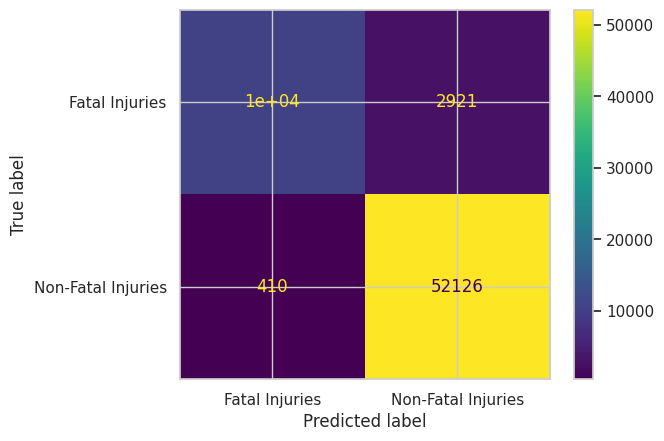

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_labels = ['Fatal Injuries', 'Non-Fatal Injuries']

# Plot confusion matrix with labels
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot()
#ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


array([[10472,  2921],
       [  410, 52126]])